In [1]:
DATA_NATURAL = '/home/xg2378/IEMOCAP_full_release'
%cd /home/xg2378/IEMOCAP_full_release

/home/xg2378/IEMOCAP_full_release


In [2]:
# read saved labels
import pandas as pd
df_tf = pd.read_csv('/home/xg2378/df_tf.csv').drop(['Unnamed: 0'],axis=1)

# #randomly select 150 per emotion
# import random

# random.seed(10)
# df_tf = df_tf.groupby('emotion',as_index = False,group_keys=False).apply(lambda s: s.sample(150,replace=True)).reset_index(drop=True)
df_tf.head(5)

,wav_file,emotion
0,/home/xg2378/IEMOCAP_full_release/Session1/sen...,angry
1,/home/xg2378/IEMOCAP_full_release/Session4/sen...,angry
2,/home/xg2378/IEMOCAP_full_release/Session4/sen...,angry
3,/home/xg2378/IEMOCAP_full_release/Session1/sen...,angry
4,/home/xg2378/IEMOCAP_full_release/Session5/sen...,angry


Note:
- original emotions: angry, happy, sad, neutral, frustrated, excited, fearful, surprised, disgusted, other 
- dimensions: valence (positive vs. negative); activation (calm vs. excited); and dominance (passive vs. aggressive)

For data cleaning, in order to maintain the balance of each emotions, we will merge 'excited' to 'happy', and exclude 'xxx', 'sur', 'fea', 'oth', 'dis. Thus, the final cleaned emotions are: **happy, neutral, angry, sad**

## feature extractor: HUBERT_BASE 

In [3]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

1.12.1+cu113
0.12.1+cu113
cuda


In [4]:
bundle = torchaudio.pipelines.HUBERT_BASE

model = bundle.get_model().to(device)

print(model.__class__)



<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [5]:
# Get waves for all data
waveforms = []

for i in range(len(df_tf)):
  cur_wave, cur_sample_rate = torchaudio.load(df_tf['wav_file'][i])
  if cur_sample_rate != bundle.sample_rate:
    cur_wave = cur_wave.to(device)
    cur_wave = torchaudio.functional.resample(cur_wave, cur_sample_rate, bundle.sample_rate)
  waveforms.append([df_tf['wav_file'][i], df_tf['emotion'][i], cur_wave])


In [6]:
# get feature for all data
waveforms_results = [] # waveforms + features extracted
from tqdm import tqdm

for i in tqdm(range(len(waveforms))):
    entry, emotion, wave = waveforms[i]
    with torch.inference_mode():
      wave = wave.to(device)
      features, _ = model.extract_features(wave)
      emission, _ = model(wave)
      waveforms_results.append([entry,emotion, wave, features, emission])

100%|████████████████████████████████████████████████████████████████████████| 600/600 [00:34<00:00, 17.25it/s]


In [7]:
waveforms_results_dict = {}

for w in waveforms_results:
    waveforms_results_dict[w[0]] = [w[3],w[1]]

In [8]:
features = [v[0] for k,v in waveforms_results_dict.items()]
labels = [v[1] for k,v in waveforms_results_dict.items()]

## TSNE plot

In [15]:
# audios = [feat[0][0] for feat in features] # last layer
# audios1 = [audio.cpu().numpy().tolist()[0] for audio in audios]  # last layer converted into numpy format
# audios2 = [torch.mean(audio, dim=0).tolist() for audio in audios] # mean layer


  0%|                                                                                   | 0/12 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


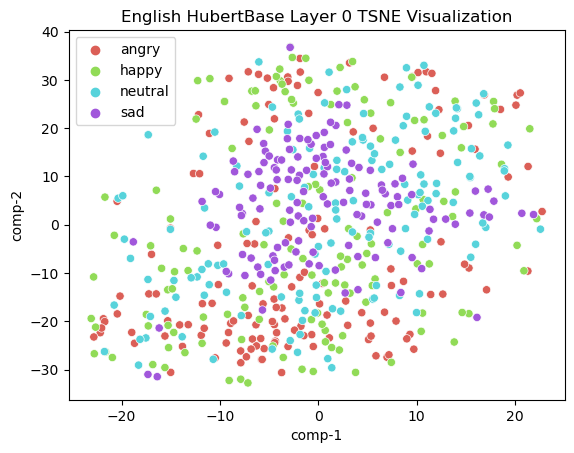

  8%|██████▎                                                                    | 1/12 [00:06<01:06,  6.06s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


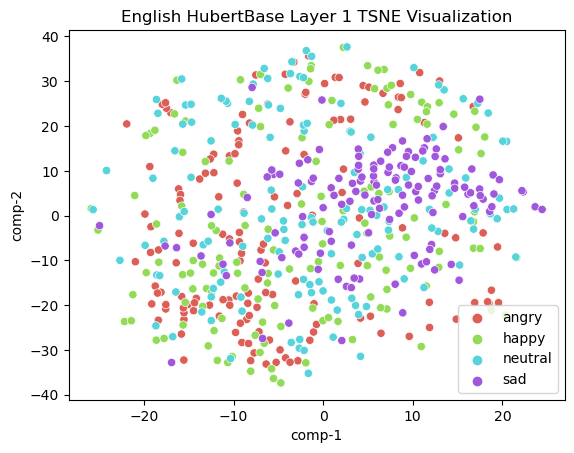

 17%|████████████▌                                                              | 2/12 [00:12<01:01,  6.13s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


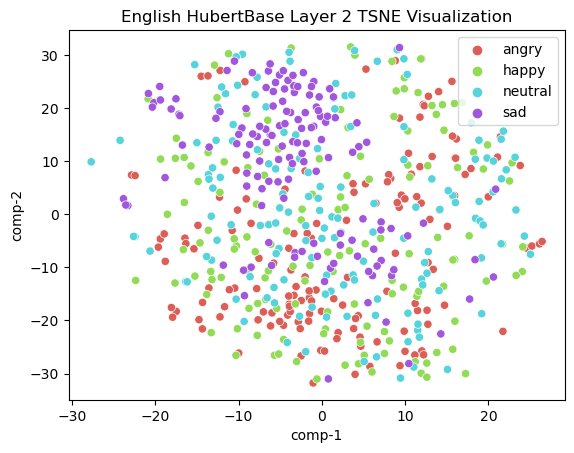

 25%|██████████████████▊                                                        | 3/12 [00:18<00:54,  6.01s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


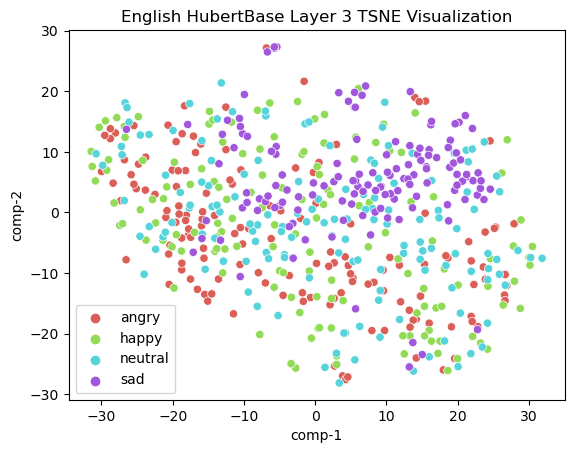

 33%|█████████████████████████                                                  | 4/12 [00:23<00:47,  5.93s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


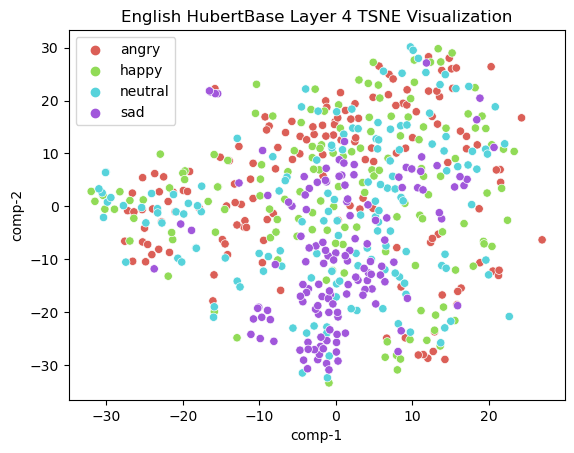

 42%|███████████████████████████████▎                                           | 5/12 [00:29<00:41,  5.87s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


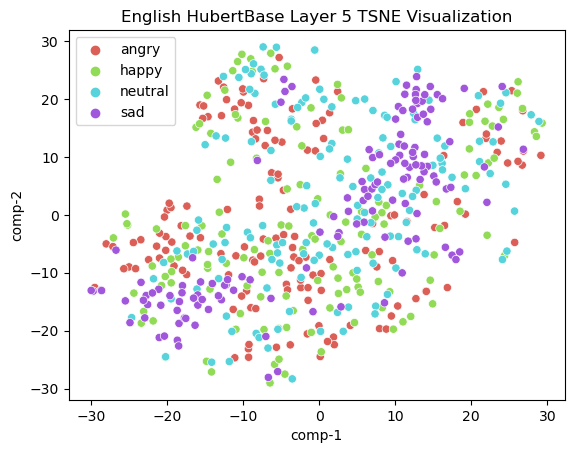

 50%|█████████████████████████████████████▌                                     | 6/12 [00:35<00:35,  5.85s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


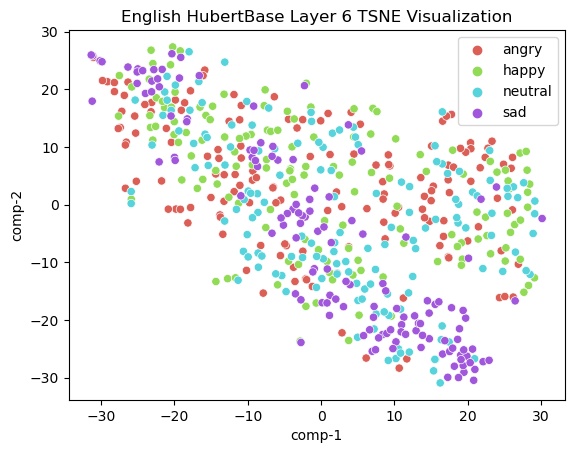

 58%|███████████████████████████████████████████▊                               | 7/12 [00:42<00:30,  6.18s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


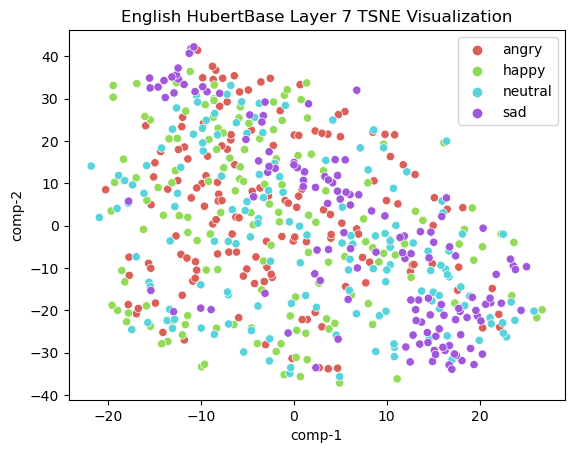

 67%|██████████████████████████████████████████████████                         | 8/12 [00:48<00:24,  6.13s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


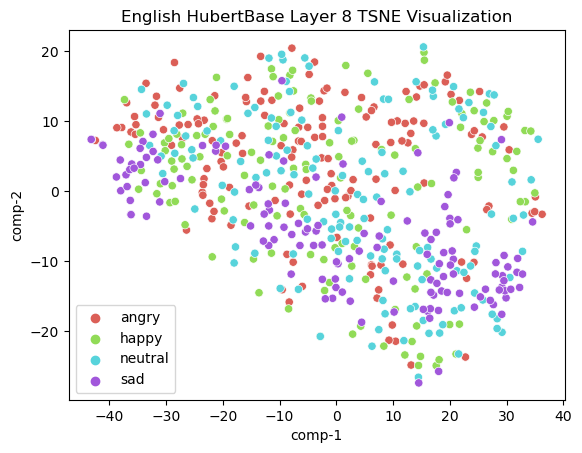

 75%|████████████████████████████████████████████████████████▎                  | 9/12 [00:54<00:18,  6.12s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


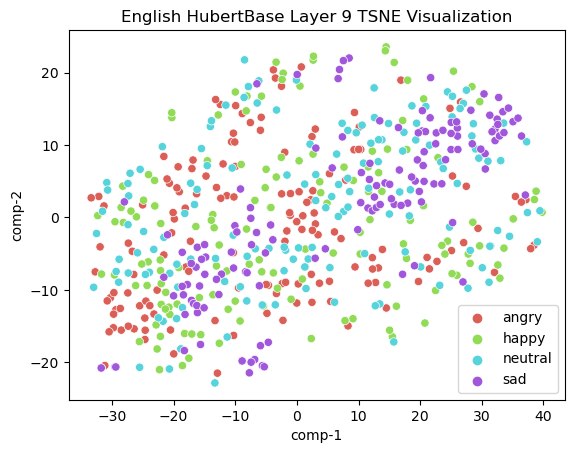

 83%|█████████████████████████████████████████████████████████████▋            | 10/12 [01:00<00:12,  6.23s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


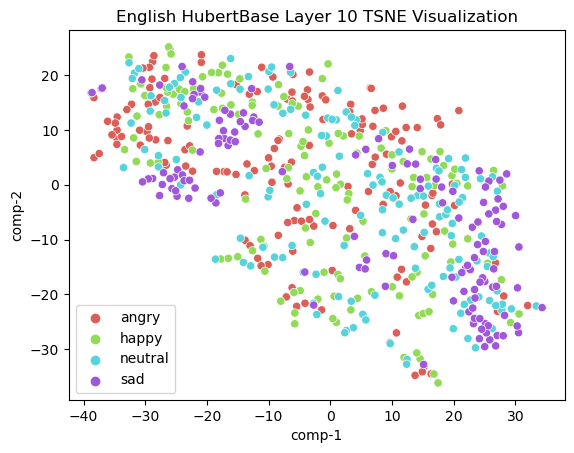

 92%|███████████████████████████████████████████████████████████████████▊      | 11/12 [01:06<00:06,  6.15s/it]/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


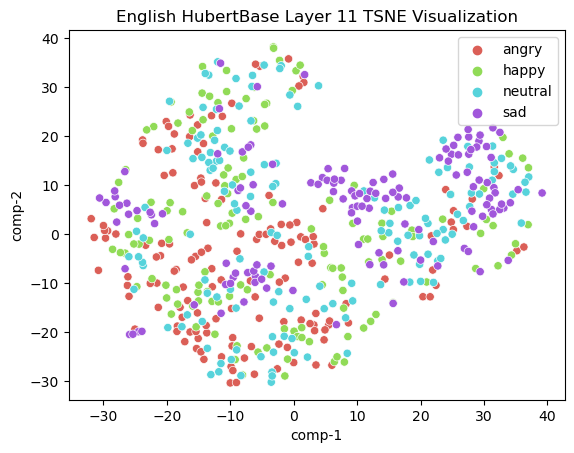

100%|██████████████████████████████████████████████████████████████████████████| 12/12 [01:12<00:00,  6.06s/it]


In [16]:
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from tqdm import tqdm

for layer in tqdm(range(12)):
    
    audios_i = [feat[layer][0] for feat in features] # layer i
    audios_i = [audio.cpu().numpy().tolist()[0] for audio in audios_i] # layer converted into numpy format
    tsne = TSNE(n_components=2, verbose=0,random_state=4800, perplexity=20)
    z = tsne.fit_transform(audios_i) 

    df = pd.DataFrame()
    df["y"] = labels
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 4),
                    data=df)
    plt.title(f'English HubertBase Layer {layer} TSNE Visualization')
    plt.savefig(f'/home/xg2378/TSNE_results/tsne_hubertbase_layer_{layer}.png')
    plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


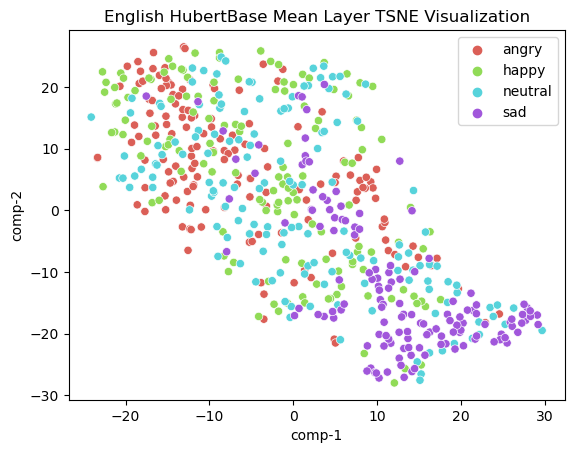

In [17]:
# mean layer
audios = [feat[0][0]+feat[1][0]+feat[2][0]+feat[3][0]+feat[4][0]+feat[5][0]+
          feat[6][0]+feat[7][0]+feat[8][0]+feat[9][0]+feat[10][0]+feat[11][0]
          for feat in features]
audios2 = [torch.mean(audio, dim=0).tolist() for audio in audios] # mean layer

tsne = TSNE(n_components=2, verbose=0, random_state=123)
z = tsne.fit_transform(audios2) 

df = pd.DataFrame()
df["y"] = labels
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df)
plt.title(f'English HubertBase Mean Layer TSNE Visualization')
plt.savefig(f'/home/xg2378/TSNE_results/tsne_hubertbase_meanlayer.png')
plt.show()

## Train with 3CNN+LSTM

In [9]:
class MyDataSet(torch.utils.data.Dataset):
    def __init__(self, data, label, label_transform):
        super(MyDataSet).__init__()
        self.data = data
        self.label = label
        self.label_transform = label_transform
        
    def __getitem__(self, idx):
        audio = self.data[idx]
        label = self.label_transform[self.label[idx]]
        length = self.data[idx].size(0)
        return audio, length, label
    
    def __len__(self):
        return len(self.label)

In [10]:
categories = ['happy', 'neutral', 'angry', 'sad']
category_dict = {}
for i, cate in enumerate(categories):
    category_dict[cate] = i
category_dict


{'happy': 0, 'neutral': 1, 'angry': 2, 'sad': 3}

In [11]:
def collate_indic(data):
    _, lengths, labels = zip(*data)
    max_len = max(lengths)
    n_ftrs = data[0][0].size(1)
    features = torch.zeros((len(data), max_len, n_ftrs))
    labels = torch.tensor(labels)
    lengths = torch.tensor(lengths)

    for i in range(len(data)):
        j, k = data[i][0].size(0), data[i][0].size(1)
        features[i] = torch.cat([data[i][0], torch.zeros((max_len - j, k)).to(device)])

    return features, lengths, labels

### Model Preparation

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class ICASSP3CNN(nn.Module):
    def __init__(self, vocab_size, embed_size=128, hidden_size=512, num_lstm_layers = 2, bidirectional = False, label_size=7):
        super().__init__()
        self.n_layers = num_lstm_layers 
        self.hidden = hidden_size
        self.bidirectional = bidirectional
        
        self.embed = nn.Linear(in_features = vocab_size, out_features = embed_size)

        self.cnn  = nn.Conv1d(embed_size, embed_size, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv1d(embed_size, embed_size, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(embed_size, embed_size, kernel_size=7, padding=3)

        self.batchnorm = nn.BatchNorm1d(3 * embed_size)

        self.lstm = nn.LSTM(input_size = 3 * embed_size, 
                            hidden_size = hidden_size, 
                            num_layers = num_lstm_layers, 
                            bidirectional = bidirectional)

        self.linear = nn.Linear(in_features = 2 * hidden_size if bidirectional else hidden_size, 
                                out_features = label_size)


    def forward(self, x, lengths):
        """
        padded_x: (B,T) padded LongTensor
        """

        input = self.embed(x)

        batch_size = input.size(0)
        input = input.transpose(1,2)    # (B,T,H) -> (B,H,T)

        cnn_output = torch.cat([self.cnn(input), self.cnn2(input), self.cnn3(input)], dim=1)

        input = F.relu(self.batchnorm(cnn_output))

        input = input.transpose(1,2)

        pack_tensor = nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, cn) = self.lstm(pack_tensor)

        if self.bidirectional:
            h_n = hn.view(self.n_layers, 2, batch_size, self.hidden)
            h_n = torch.cat([ h_n[-1, 0,:], h_n[-1,1,:] ], dim = 1)
        else:
            h_n = hn[-1]

        logits = self.linear(h_n)

        return logits

### Model Traning on each layer 

In [29]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
     

layer = 0


In [30]:
audios_i = [feat[layer][0] for feat in features]
X_train, X_test, y_train, y_test = train_test_split(audios_i, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=4800)

train_dataset = MyDataSet(X_train, y_train, category_dict)
trainloader_args = dict(batch_size=1, shuffle=True)
train_dataloader = DataLoader(train_dataset, **trainloader_args, 
                              collate_fn=collate_indic)

test_dataset = MyDataSet(X_test, y_test, category_dict)
testloader_args = dict(batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, **testloader_args, 
                             collate_fn=collate_indic)

ValueError: Found input variables with inconsistent numbers of samples: [571, 1]

In [15]:

for batch, data in enumerate(train_dataloader):
    x, length, y = data
    print(batch, x.shape)

0 torch.Size([64, 740, 768])
1 torch.Size([64, 880, 768])
2 torch.Size([64, 767, 768])
3 torch.Size([64, 1052, 768])
4 torch.Size([64, 904, 768])
5 torch.Size([64, 720, 768])
6 torch.Size([64, 953, 768])
7 torch.Size([8, 467, 768])


In [19]:
from tqdm import tqdm
from torchsummary import summary
import torch.optim as optim

model = ICASSP3CNN(768)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

epochs = 50
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.train()
    for batch, (x, length, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        logits = model(x, length)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.cpu().item()

        #model outputs
        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    train_loss = train_loss/batch_cnt
    train_accuracy = acc_cnt/(acc_cnt+err_cnt)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    
    valid_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.eval()

    for x, lengths, y in test_dataloader:

        x = x.to(device)
        y = y.to(device)

        logits = model(x, lengths)
        loss = criterion(logits, y)
        valid_loss += loss.cpu().item()

        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    valid_loss = valid_loss/batch_cnt
    valid_accuracy = acc_cnt/(acc_cnt+err_cnt)
    valid_accuracies.append(valid_accuracy)
    valid_losses.append(valid_loss)
    
    print(f"epoch:{epoch+1}, train accu:{train_accuracy:.4f},", 
          f"train loss:{train_loss:.2f}, valid accu:{valid_accuracy:.4f},", 
          f"valid loss:{valid_loss:.2f}")

  2%|█▌                                                                         | 1/50 [00:04<03:50,  4.70s/it]

epoch:1, train accu:0.2478, train loss:1.82, valid accu:0.2348, valid loss:1.43


  4%|███                                                                        | 2/50 [00:08<03:29,  4.36s/it]

epoch:2, train accu:0.2719, train loss:1.41, valid accu:0.2783, valid loss:1.40


  6%|████▌                                                                      | 3/50 [00:12<03:17,  4.21s/it]

epoch:3, train accu:0.2719, train loss:1.38, valid accu:0.2348, valid loss:1.38


  8%|██████                                                                     | 4/50 [00:17<03:12,  4.19s/it]

epoch:4, train accu:0.2544, train loss:1.34, valid accu:0.4609, valid loss:1.28


 10%|███████▌                                                                   | 5/50 [00:21<03:08,  4.18s/it]

epoch:5, train accu:0.4496, train loss:1.32, valid accu:0.4348, valid loss:1.20


 12%|█████████                                                                  | 6/50 [00:25<03:03,  4.17s/it]

epoch:6, train accu:0.4868, train loss:1.17, valid accu:0.5043, valid loss:1.17


 14%|██████████▌                                                                | 7/50 [00:29<02:57,  4.13s/it]

epoch:7, train accu:0.4978, train loss:1.14, valid accu:0.4696, valid loss:1.15


 16%|████████████                                                               | 8/50 [00:33<02:54,  4.15s/it]

epoch:8, train accu:0.4715, train loss:1.11, valid accu:0.4348, valid loss:1.16


 18%|█████████████▌                                                             | 9/50 [00:37<02:48,  4.12s/it]

epoch:9, train accu:0.4978, train loss:1.10, valid accu:0.4783, valid loss:1.07


 20%|██████████████▊                                                           | 10/50 [00:41<02:43,  4.09s/it]

epoch:10, train accu:0.5241, train loss:1.02, valid accu:0.4870, valid loss:1.08


 22%|████████████████▎                                                         | 11/50 [00:45<02:39,  4.08s/it]

epoch:11, train accu:0.5307, train loss:1.01, valid accu:0.4957, valid loss:1.11


 24%|█████████████████▊                                                        | 12/50 [00:49<02:35,  4.08s/it]

epoch:12, train accu:0.5439, train loss:0.98, valid accu:0.4348, valid loss:1.26


 26%|███████████████████▏                                                      | 13/50 [00:53<02:30,  4.08s/it]

epoch:13, train accu:0.5219, train loss:1.07, valid accu:0.4435, valid loss:1.13


 28%|████████████████████▋                                                     | 14/50 [00:57<02:25,  4.04s/it]

epoch:14, train accu:0.5548, train loss:1.02, valid accu:0.5043, valid loss:1.12


 30%|██████████████████████▏                                                   | 15/50 [01:02<02:23,  4.11s/it]

epoch:15, train accu:0.5921, train loss:0.95, valid accu:0.5565, valid loss:1.09


 32%|███████████████████████▋                                                  | 16/50 [01:06<02:19,  4.10s/it]

epoch:16, train accu:0.5855, train loss:0.90, valid accu:0.4174, valid loss:1.24


 34%|█████████████████████████▏                                                | 17/50 [01:10<02:14,  4.07s/it]

epoch:17, train accu:0.6096, train loss:0.99, valid accu:0.5043, valid loss:1.15


 36%|██████████████████████████▋                                               | 18/50 [01:14<02:09,  4.05s/it]

epoch:18, train accu:0.5724, train loss:0.92, valid accu:0.4783, valid loss:1.29


 38%|████████████████████████████                                              | 19/50 [01:18<02:05,  4.03s/it]

epoch:19, train accu:0.5702, train loss:0.95, valid accu:0.5478, valid loss:1.13


 40%|█████████████████████████████▌                                            | 20/50 [01:22<02:01,  4.05s/it]

epoch:20, train accu:0.5724, train loss:0.91, valid accu:0.4783, valid loss:1.12


 42%|███████████████████████████████                                           | 21/50 [01:26<01:57,  4.07s/it]

epoch:21, train accu:0.5877, train loss:0.93, valid accu:0.5130, valid loss:1.15


 44%|████████████████████████████████▌                                         | 22/50 [01:30<01:53,  4.04s/it]

epoch:22, train accu:0.6338, train loss:0.85, valid accu:0.5391, valid loss:1.20


 46%|██████████████████████████████████                                        | 23/50 [01:34<01:49,  4.04s/it]

epoch:23, train accu:0.6754, train loss:0.79, valid accu:0.5217, valid loss:1.20


 48%|███████████████████████████████████▌                                      | 24/50 [01:38<01:45,  4.04s/it]

epoch:24, train accu:0.6535, train loss:0.81, valid accu:0.4783, valid loss:1.26


 50%|█████████████████████████████████████                                     | 25/50 [01:42<01:41,  4.06s/it]

epoch:25, train accu:0.6996, train loss:0.75, valid accu:0.4957, valid loss:1.27


 52%|██████████████████████████████████████▍                                   | 26/50 [01:46<01:37,  4.05s/it]

epoch:26, train accu:0.6908, train loss:0.79, valid accu:0.5130, valid loss:1.42


 54%|███████████████████████████████████████▉                                  | 27/50 [01:50<01:33,  4.06s/it]

epoch:27, train accu:0.6447, train loss:0.89, valid accu:0.4870, valid loss:1.28


 56%|█████████████████████████████████████████▍                                | 28/50 [01:54<01:29,  4.06s/it]

epoch:28, train accu:0.6820, train loss:0.79, valid accu:0.5043, valid loss:1.28


 58%|██████████████████████████████████████████▉                               | 29/50 [01:58<01:24,  4.05s/it]

epoch:29, train accu:0.6930, train loss:0.76, valid accu:0.5304, valid loss:1.24


 60%|████████████████████████████████████████████▍                             | 30/50 [02:03<01:23,  4.16s/it]

epoch:30, train accu:0.7193, train loss:0.73, valid accu:0.4957, valid loss:1.28


 62%|█████████████████████████████████████████████▉                            | 31/50 [02:07<01:17,  4.08s/it]

epoch:31, train accu:0.7127, train loss:0.71, valid accu:0.5130, valid loss:1.31


 64%|███████████████████████████████████████████████▎                          | 32/50 [02:11<01:13,  4.10s/it]

epoch:32, train accu:0.7325, train loss:0.79, valid accu:0.4870, valid loss:1.42


 66%|████████████████████████████████████████████████▊                         | 33/50 [02:15<01:09,  4.08s/it]

epoch:33, train accu:0.7237, train loss:0.65, valid accu:0.5304, valid loss:1.31


 68%|██████████████████████████████████████████████████▎                       | 34/50 [02:19<01:05,  4.08s/it]

epoch:34, train accu:0.7434, train loss:0.68, valid accu:0.4870, valid loss:1.38


 70%|███████████████████████████████████████████████████▊                      | 35/50 [02:23<01:01,  4.09s/it]

epoch:35, train accu:0.7632, train loss:0.59, valid accu:0.4957, valid loss:1.45


 72%|█████████████████████████████████████████████████████▎                    | 36/50 [02:27<00:57,  4.08s/it]

epoch:36, train accu:0.7544, train loss:0.61, valid accu:0.5043, valid loss:1.51


 74%|██████████████████████████████████████████████████████▊                   | 37/50 [02:31<00:52,  4.07s/it]

epoch:37, train accu:0.7654, train loss:0.62, valid accu:0.4783, valid loss:1.57


 76%|████████████████████████████████████████████████████████▏                 | 38/50 [02:35<00:49,  4.09s/it]

epoch:38, train accu:0.7697, train loss:0.56, valid accu:0.4783, valid loss:1.52


 78%|█████████████████████████████████████████████████████████▋                | 39/50 [02:39<00:44,  4.08s/it]

epoch:39, train accu:0.8114, train loss:0.54, valid accu:0.4609, valid loss:1.61


 80%|███████████████████████████████████████████████████████████▏              | 40/50 [02:43<00:40,  4.08s/it]

epoch:40, train accu:0.8026, train loss:0.50, valid accu:0.5130, valid loss:1.60


 82%|████████████████████████████████████████████████████████████▋             | 41/50 [02:47<00:36,  4.10s/it]

epoch:41, train accu:0.7961, train loss:0.48, valid accu:0.4609, valid loss:1.74


 84%|██████████████████████████████████████████████████████████████▏           | 42/50 [02:52<00:32,  4.10s/it]

epoch:42, train accu:0.8224, train loss:0.53, valid accu:0.4870, valid loss:1.74


 86%|███████████████████████████████████████████████████████████████▋          | 43/50 [02:55<00:28,  4.06s/it]

epoch:43, train accu:0.8246, train loss:0.59, valid accu:0.5130, valid loss:1.55


 88%|█████████████████████████████████████████████████████████████████         | 44/50 [03:00<00:24,  4.08s/it]

epoch:44, train accu:0.8004, train loss:0.58, valid accu:0.4870, valid loss:1.57


 90%|██████████████████████████████████████████████████████████████████▌       | 45/50 [03:04<00:20,  4.12s/it]

epoch:45, train accu:0.8092, train loss:0.53, valid accu:0.5043, valid loss:1.66


 92%|████████████████████████████████████████████████████████████████████      | 46/50 [03:08<00:16,  4.08s/it]

epoch:46, train accu:0.8575, train loss:0.51, valid accu:0.4783, valid loss:1.78


 94%|█████████████████████████████████████████████████████████████████████▌    | 47/50 [03:12<00:12,  4.05s/it]

epoch:47, train accu:0.8443, train loss:0.55, valid accu:0.4696, valid loss:1.60


 96%|███████████████████████████████████████████████████████████████████████   | 48/50 [03:16<00:08,  4.04s/it]

epoch:48, train accu:0.8531, train loss:0.52, valid accu:0.4870, valid loss:1.52


 98%|████████████████████████████████████████████████████████████████████████▌ | 49/50 [03:20<00:04,  4.08s/it]

epoch:49, train accu:0.8224, train loss:0.48, valid accu:0.4870, valid loss:1.55


100%|██████████████████████████████████████████████████████████████████████████| 50/50 [03:24<00:00,  4.09s/it]

epoch:50, train accu:0.8772, train loss:0.39, valid accu:0.4957, valid loss:1.67


In [21]:
model_path = f'/home/xg2378/models/hubert_base_{layer}.pth'

torch.save({'epoch':epochs,
            'model_state_dict':model.state_dict(),
            'optimizer_state_dict':optimizer.state_dict()},
            model_path)

metadata = pd.DataFrame({'epoch':range(epochs), 'train loss':train_losses, 
                         'valid loss':valid_losses, 'train accu':train_accuracies, 
                         'valid_accu':valid_accuracies})
metadata.to_csv(f'/home/xg2378/results/acc_loss/hubertbase_{layer}.csv ', 
                index=False)
     


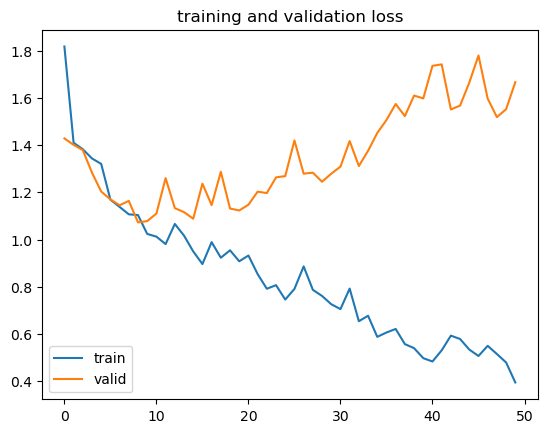

In [22]:

import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses, label='train')
plt.plot(range(epochs), valid_losses, label='valid')
plt.legend()
plt.title('training and validation loss')
plt.show()
     

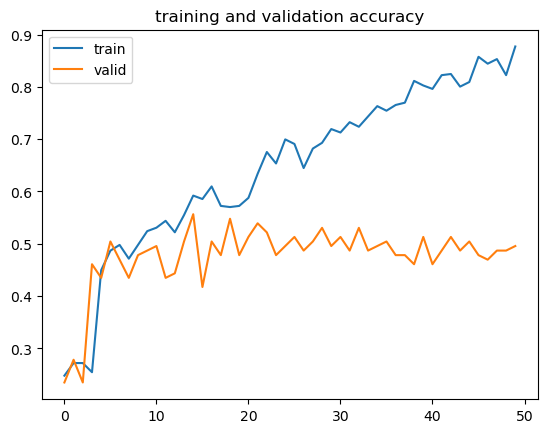

In [23]:
plt.plot(range(epochs), train_accuracies, label='train')
plt.plot(range(epochs), valid_accuracies, label='valid')
plt.legend()
plt.title('training and validation accuracy')
plt.show()
     


In [24]:


from sklearn.metrics import confusion_matrix

y_pred = []
y_true = []

for inputs, lengths, labels in test_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output = model(inputs, lengths) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction

    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth



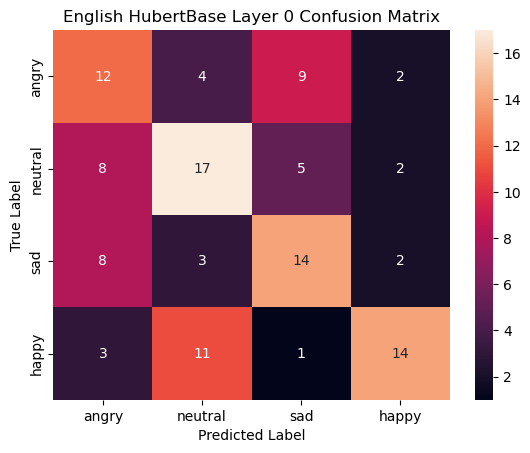

In [26]:
import numpy as np
import seaborn as sns
cf = confusion_matrix(y_true, y_pred)
classes = list(set([v[1] for k,v in waveforms_results_dict.items()]))
df_cm = pd.DataFrame(cf, index = [i for i in classes],
                     columns = [i for i in classes])
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'English HubertBase Layer {layer} Confusion Matrix')
plt.savefig(f'/home/xg2378/results/confusion_matrix/confusion_hubertbase_{layer}.png')
     


In [27]:
# check if it's done
print('done')

done
